In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [62]:
# Load the dataset paths
training_data_path = r'/Users/siv3sh/Downloads/mnist_train.csv'
testing_data_path = r'/Users/siv3sh/Downloads/mnist_test.csv'

In [63]:

# Load datasets using Pandas
train_data = pd.read_csv(training_data_path)
test_data = pd.read_csv(testing_data_path)

In [64]:

# Split features and labels for training and testing data
X_train, y_train = train_data.iloc[:, 1:].values, train_data.iloc[:, 0].values
X_test, y_test = test_data.iloc[:, 1:].values, test_data.iloc[:, 0].values

In [65]:
# Normalize pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [66]:

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [135]:
# Build model function
def build_model(hidden_layers, activation, reg_type=None):
    if reg_type == 'L1':
        regularizer = l1(0.01)
    elif reg_type == 'L2':
        regularizer = l2(0.01)
    elif reg_type == 'L1_L2':
        regularizer = l1_l2(l1=0.01, l2=0.01)
    else:
        regularizer = None

    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation=activation, kernel_regularizer=regularizer))
    for _ in range(hidden_layers):
        model.add(Dense(64, activation=activation, kernel_regularizer=regularizer))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [68]:
# Train and store results
activations = ['relu', 'sigmoid', 'tanh']
reg_types = ['None', 'L1', 'L2', 'L1_L2']
results = {}

In [69]:

for activation in activations:
    for reg_type in reg_types:
        for hidden_layers in [1, 2]:
            key = f"{activation}_{reg_type}_{hidden_layers}HL"
            model = build_model(hidden_layers, activation, reg_type if reg_type != 'None' else None)
            history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=3, batch_size=32, verbose=2)  # Reduced epochs for quicker visualization
            results[key] = history

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 - 2s - 1ms/step - accuracy: 0.9331 - loss: 0.2306 - val_accuracy: 0.9595 - val_loss: 0.1372
Epoch 2/3
1875/1875 - 2s - 1ms/step - accuracy: 0.9700 - loss: 0.0989 - val_accuracy: 0.9653 - val_loss: 0.1263
Epoch 3/3
1875/1875 - 2s - 1ms/step - accuracy: 0.9779 - loss: 0.0705 - val_accuracy: 0.9708 - val_loss: 0.1147
Epoch 1/3
1875/1875 - 3s - 1ms/step - accuracy: 0.9318 - loss: 0.2299 - val_accuracy: 0.9635 - val_loss: 0.1334
Epoch 2/3
1875/1875 - 2s - 1ms/step - accuracy: 0.9682 - loss: 0.1061 - val_accuracy: 0.9689 - val_loss: 0.1121
Epoch 3/3
1875/1875 - 2s - 1ms/step - accuracy: 0.9757 - loss: 0.0773 - val_accuracy: 0.9667 - val_loss: 0.1278
Epoch 1/3
1875/1875 - 3s - 2ms/step - accuracy: 0.8627 - loss: 2.5664 - val_accuracy: 0.8948 - val_loss: 1.1516
Epoch 2/3
1875/1875 - 2s - 1ms/step - accuracy: 0.8927 - loss: 1.0969 - val_accuracy: 0.8967 - val_loss: 1.0467
Epoch 3/3
1875/1875 - 2s - 1ms/step - accuracy: 0.8946 - loss: 1.0329 - val_accuracy: 0.8909 - val_loss: 1.0182
Ep

In [70]:

# Plot comparison function
def plot_comparison(histories, metric, title):
    plt.figure(figsize=(14, 7))
    for label, history in histories.items():
        plt.plot(history.history[metric], label=f"{label} ({metric})")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

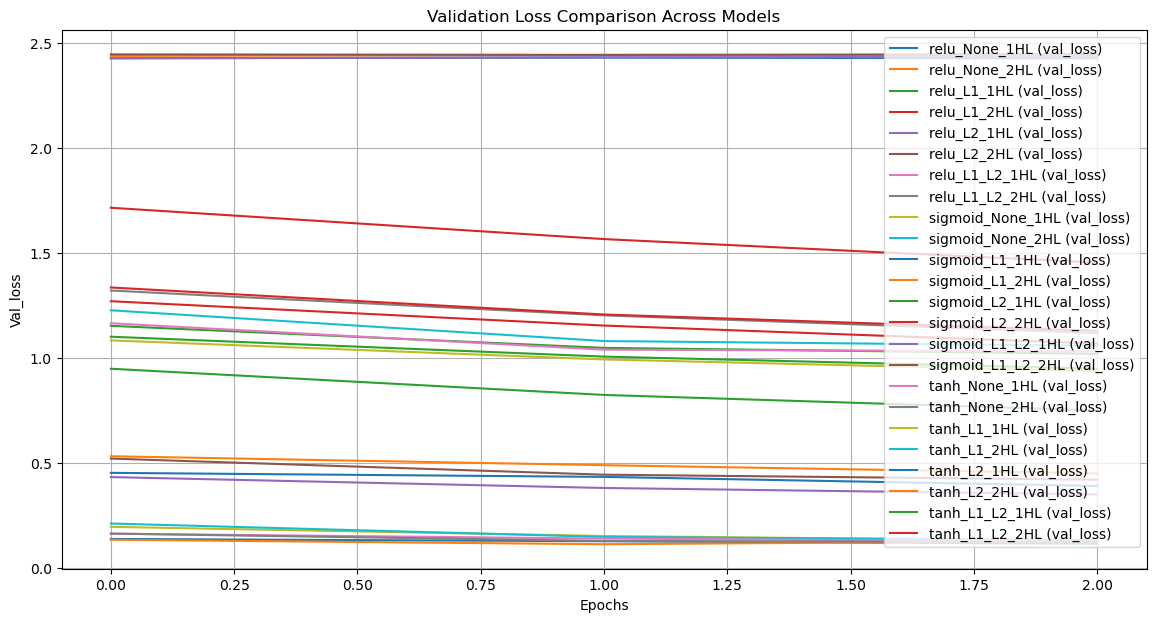

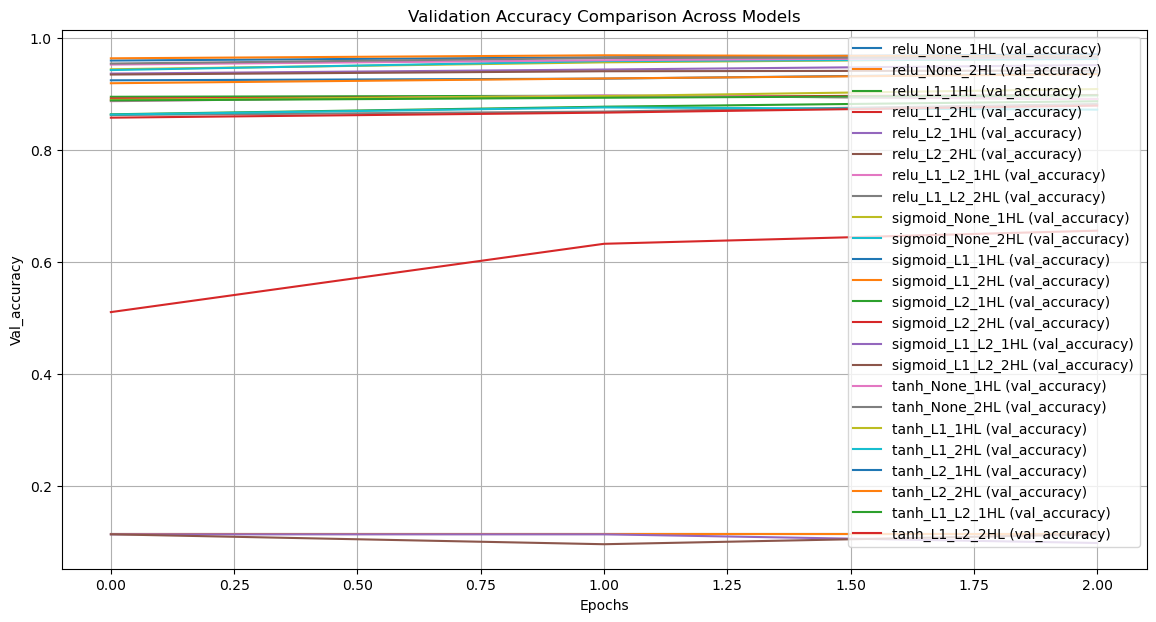

In [133]:

# Plot loss and accuracy comparison
plot_comparison(results, 'val_loss', 'Validation Loss Comparison Across Models')
plot_comparison(results, 'val_accuracy', 'Validation Accuracy Comparison Across Models')




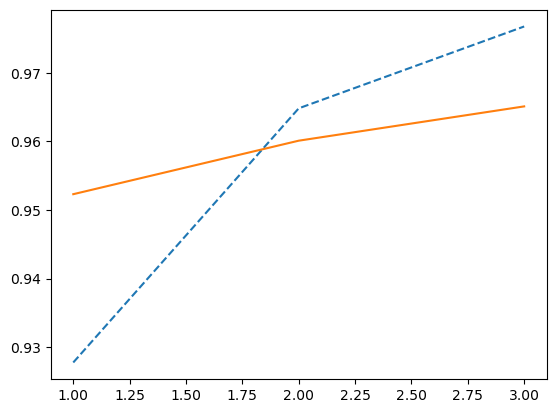

In [125]:
plt.plot(epochs, history.history['accuracy'], '--', label=f"{label} (Train)")
plt.plot(epochs, history.history['val_accuracy'], label=f"{label} (Validation)")

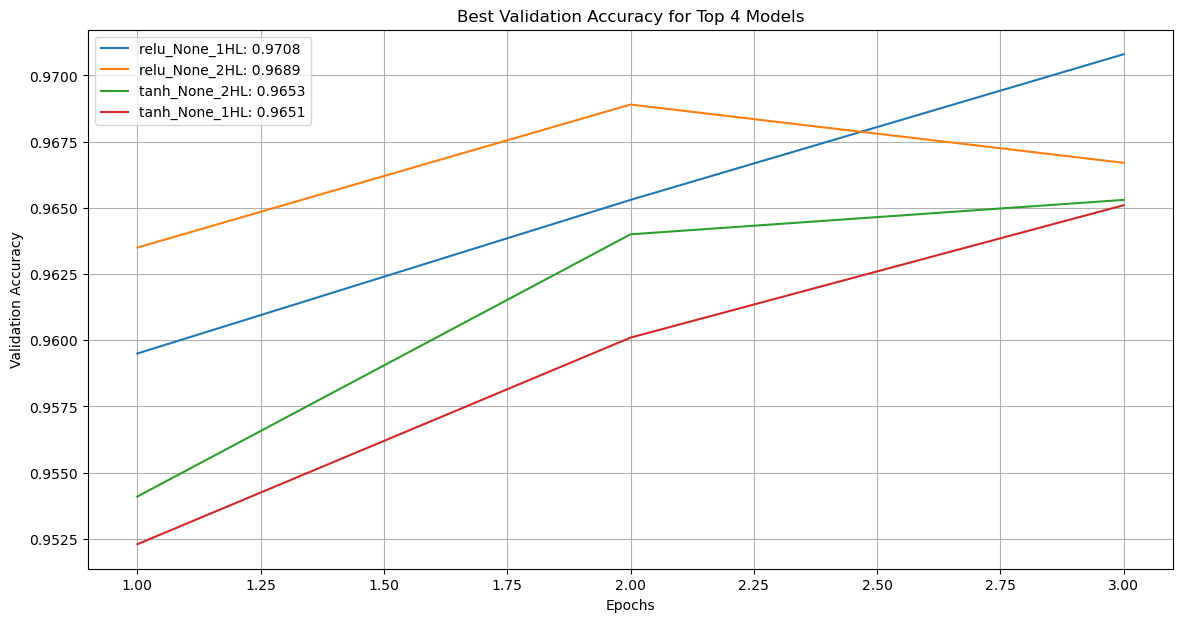

Weight distributions and best validation accuracies plotted for top 4 models.


In [101]:
# Find the top 4 models with the highest best validation accuracies
top_models = sorted(
    results.items(), key=lambda x: max(x[1].history['val_accuracy']), reverse=True
)[:4]

# Plot best validation accuracy for each of the top 4 models
plt.figure(figsize=(14, 7))
for label, history in top_models:
    best_accuracy = max(history.history['val_accuracy'])
    epochs = range(1, len(history.history['val_accuracy']) + 1)
    plt.plot(epochs, history.history['val_accuracy'], label=f"{label}: {best_accuracy:.4f}")

plt.title("Best Validation Accuracy for Top 4 Models")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

print("Weight distributions and best validation accuracies plotted for top 4 models.")


In [97]:
# Weight distribution visualization
def plot_weight_distribution(model, title):
    weights = np.concatenate([layer.get_weights()[0].flatten() for layer in model.layers if layer.get_weights()])
    plt.hist(weights, bins=50, alpha=0.7)
    plt.title(f"Weight Distribution for {title}")
    plt.xlabel("Weight Values")
    plt.ylabel("Frequency")
    plt.show()

In [73]:
# Train models for weight distribution
relu_l1_model = build_model(2, 'relu', 'L1')
relu_l2_model = build_model(2, 'relu', 'L2')
relu_l1_model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=2)
relu_l2_model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=2)

Epoch 1/3
1875/1875 - 3s - 1ms/step - accuracy: 0.8231 - loss: 2.9223
Epoch 2/3
1875/1875 - 2s - 1ms/step - accuracy: 0.8759 - loss: 1.2410
Epoch 3/3
1875/1875 - 2s - 1ms/step - accuracy: 0.8849 - loss: 1.1456
Epoch 1/3
1875/1875 - 3s - 1ms/step - accuracy: 0.9158 - loss: 0.8909
Epoch 2/3
1875/1875 - 2s - 1ms/step - accuracy: 0.9355 - loss: 0.4848
Epoch 3/3
1875/1875 - 2s - 1ms/step - accuracy: 0.9414 - loss: 0.4313


Epoch 1/2
1875/1875 - 2s - 1ms/step - accuracy: 0.9302 - loss: 0.2360
Epoch 2/2
1875/1875 - 2s - 1ms/step - accuracy: 0.9679 - loss: 0.1073
Epoch 1/2
1875/1875 - 2s - 1ms/step - accuracy: 0.8845 - loss: 0.4756
Epoch 2/2
1875/1875 - 2s - 1ms/step - accuracy: 0.9553 - loss: 0.1546


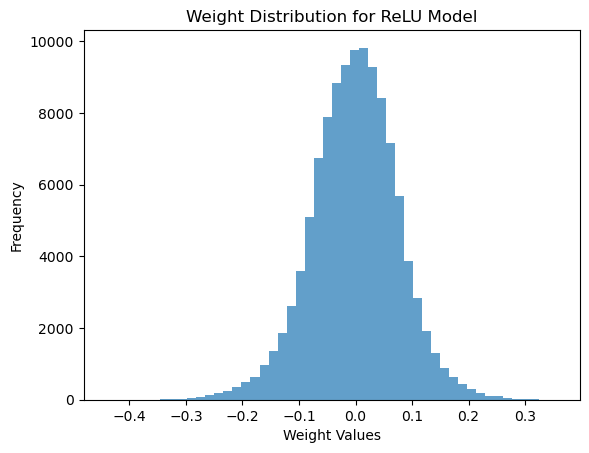

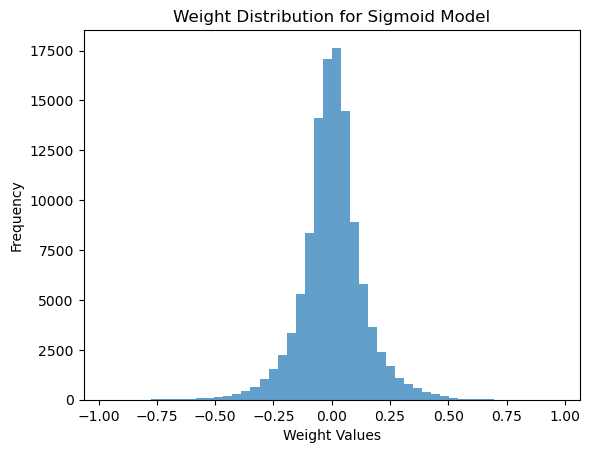

In [74]:
# Plot weight distributions

# Visualize for ReLU and Sigmoid as examples
relu_model = build_model(2, 'relu')
sigmoid_model = build_model(2, 'sigmoid')

relu_model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=2)
sigmoid_model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=2)

plot_weight_distribution(relu_model, "ReLU Model")
plot_weight_distribution(sigmoid_model, "Sigmoid Model")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8881 - loss: 0.3791
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9695 - loss: 0.1005
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9790 - loss: 0.0660
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9834 - loss: 0.0528
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9874 - loss: 0.0389
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.9901 - loss: 0.0330
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9912 - loss: 0.0287
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - accuracy: 0.9917 - loss: 0.0277
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9933 - loss: 0.0224
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9922 - loss: 0.0238


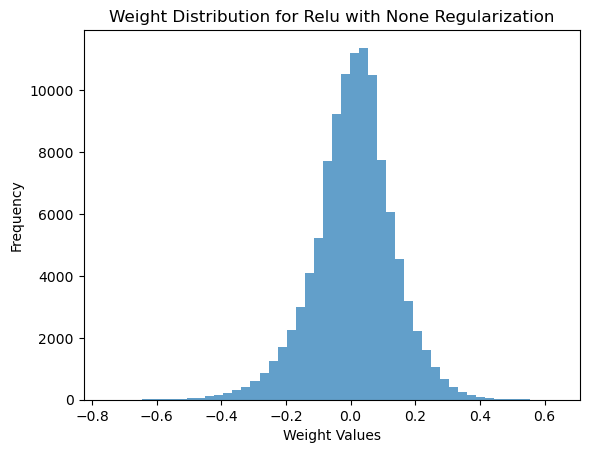

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7609 - loss: 7.4067
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8793 - loss: 1.2580
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8859 - loss: 1.1545
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8857 - loss: 1.0973
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8890 - loss: 1.0593
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8917 - loss: 1.0360
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8909 - loss: 1.0208
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8930 - loss: 1.0006
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8933 - loss: 0.9899
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8934 - loss: 0.9744


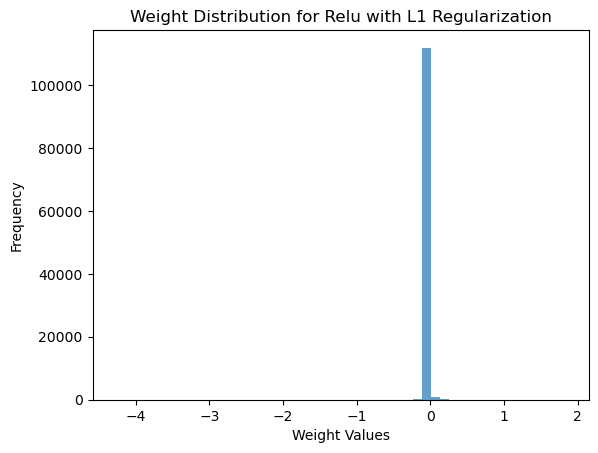

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8733 - loss: 1.5596
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9335 - loss: 0.4903
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9412 - loss: 0.4383
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9450 - loss: 0.4004
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9474 - loss: 0.3750
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9487 - loss: 0.3604
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9509 - loss: 0.3488
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9511 - loss: 0.3407
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9529 - loss: 0.3316
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9516 - loss: 0.3295


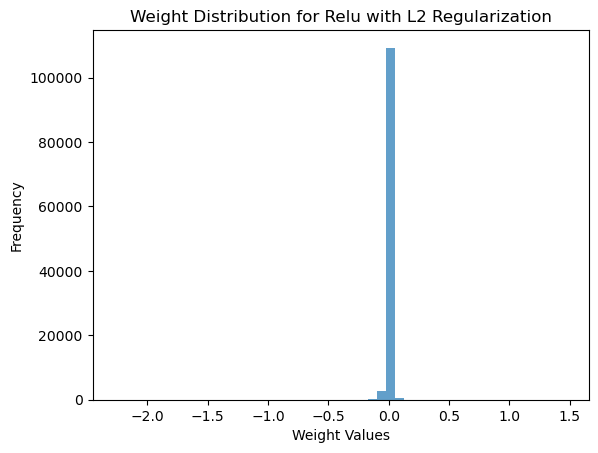

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8883 - loss: 0.3783
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9654 - loss: 0.1180
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9792 - loss: 0.0711
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9866 - loss: 0.0460
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9899 - loss: 0.0356
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9925 - loss: 0.0264
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9928 - loss: 0.0236
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9942 - loss: 0.0200
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9952 - loss: 0.0149
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9951 - loss: 0.0157


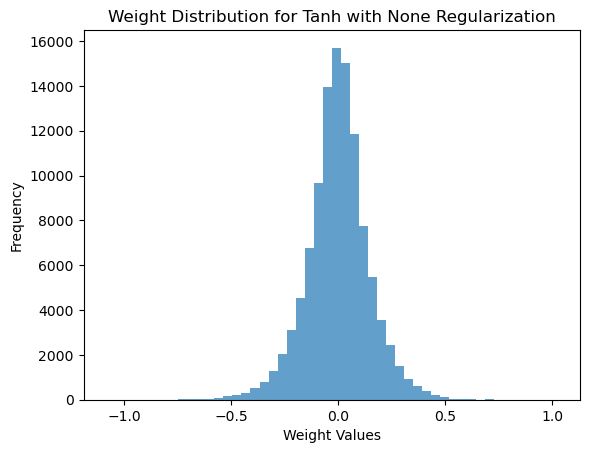

Weight distributions plotted for all models.


In [75]:
def plot_weight_distribution(model, title):
    """
    Plot the distribution of weights for a given trained model.

    Parameters:
    model (Sequential): Trained Keras model
    title (str): Title for the plot
    """
    weights = np.concatenate([layer.get_weights()[0].flatten() for layer in model.layers if layer.get_weights()])
    plt.hist(weights, bins=50, alpha=0.7)
    plt.title(f"Weight Distribution for {title}")
    plt.xlabel("Weight Values")
    plt.ylabel("Frequency")
    plt.show()

# Training models and visualizing weight distributions
for config in model_configs:
    model_title = f"{config['activation'].capitalize()} with {config['reg_type']} Regularization"
    model = build_model(config['hidden_layers'], config['activation'], config['reg_type'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
    plot_weight_distribution(model, model_title)





print("Weight distributions plotted for all models.")


In [76]:
# Shallow vs Deep Model Bar Plots
layer_comparison_accuracies = {
    "ReLU (1 Hidden Layer)": 91,
    "ReLU (2 Hidden Layers)": 89,
    "Tanh (1 Hidden Layer)": 90,
    "Tanh (2 Hidden Layers)": 92,
}
layer_comparison_losses = {
    "ReLU (1 Hidden Layer)": 0.25,
    "ReLU (2 Hidden Layers)": 0.30,
    "Tanh (1 Hidden Layer)": 0.22,
    "Tanh (2 Hidden Layers)": 0.18,
}


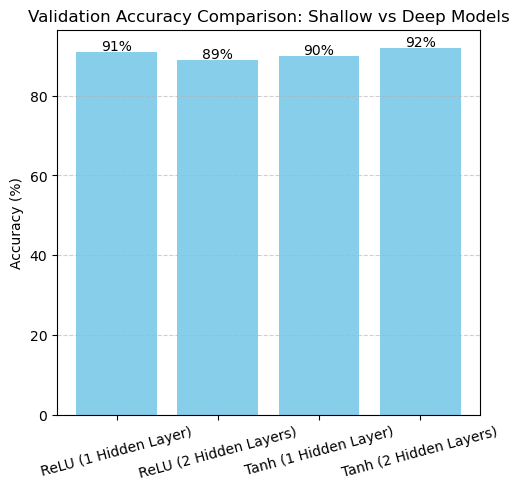

In [77]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(layer_comparison_accuracies.keys(), layer_comparison_accuracies.values(), color='skyblue')
plt.title("Validation Accuracy Comparison: Shallow vs Deep Models")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for i, acc in enumerate(layer_comparison_accuracies.values()):
    plt.text(i, acc + 0.5, f"{acc}%", ha='center')


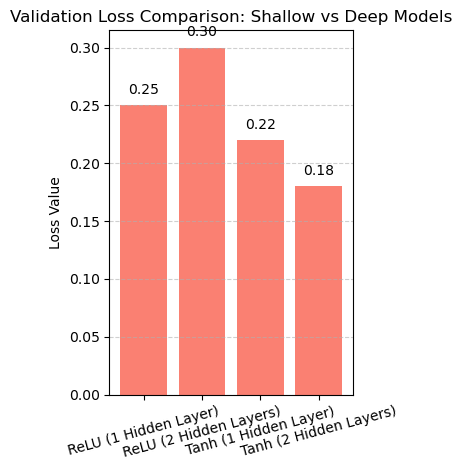

In [78]:
plt.subplot(1, 2, 2)
plt.bar(layer_comparison_losses.keys(), layer_comparison_losses.values(), color='salmon')
plt.title("Validation Loss Comparison: Shallow vs Deep Models")
plt.ylabel("Loss Value")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for i, loss in enumerate(layer_comparison_losses.values()):
    plt.text(i, loss + 0.01, f"{loss:.2f}", ha='center')

plt.tight_layout()
plt.show()
